## Machine Learning on Water_Potability Dataset
Written by: Pooja D\
Email: piyadinani@gmail.com\
Date: 07/12/23

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from scipy import stats

In [2]:
# Importing dataset
df = pd.read_csv('water_potability.csv')
# Displaying first few rows of dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Checking for missing values
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [5]:
# Handling missing values
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [6]:
# Checking for missing values again
df.isnull().sum() / len(df) * 100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [7]:
# Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

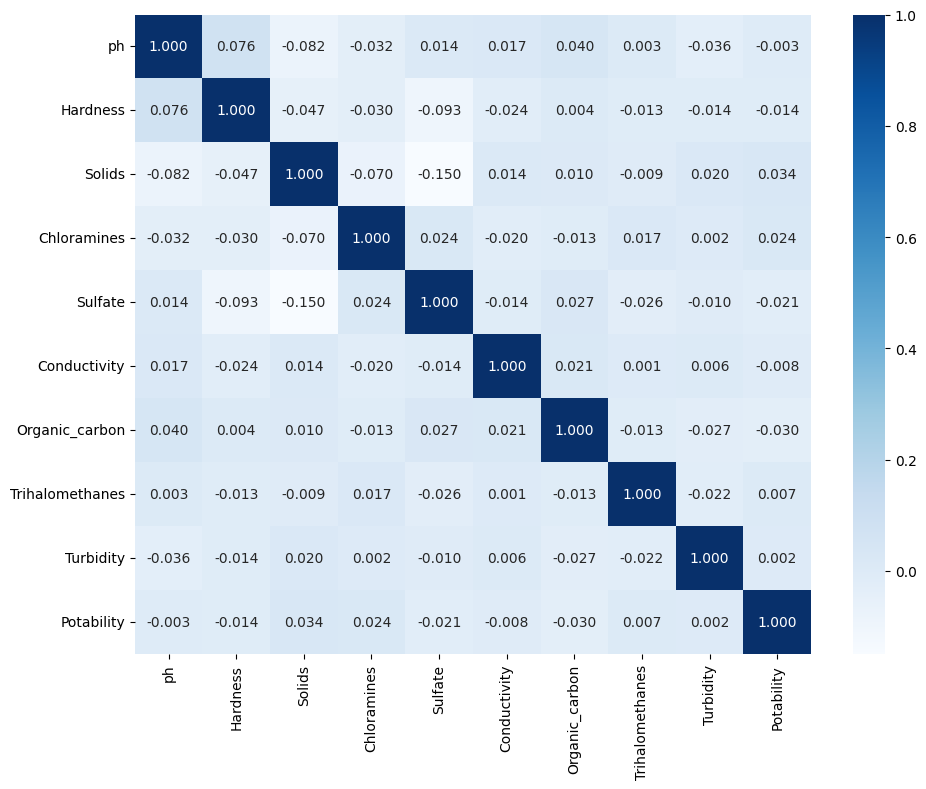

In [8]:
# Analyzing relationship between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.tight_layout()
plt.show()

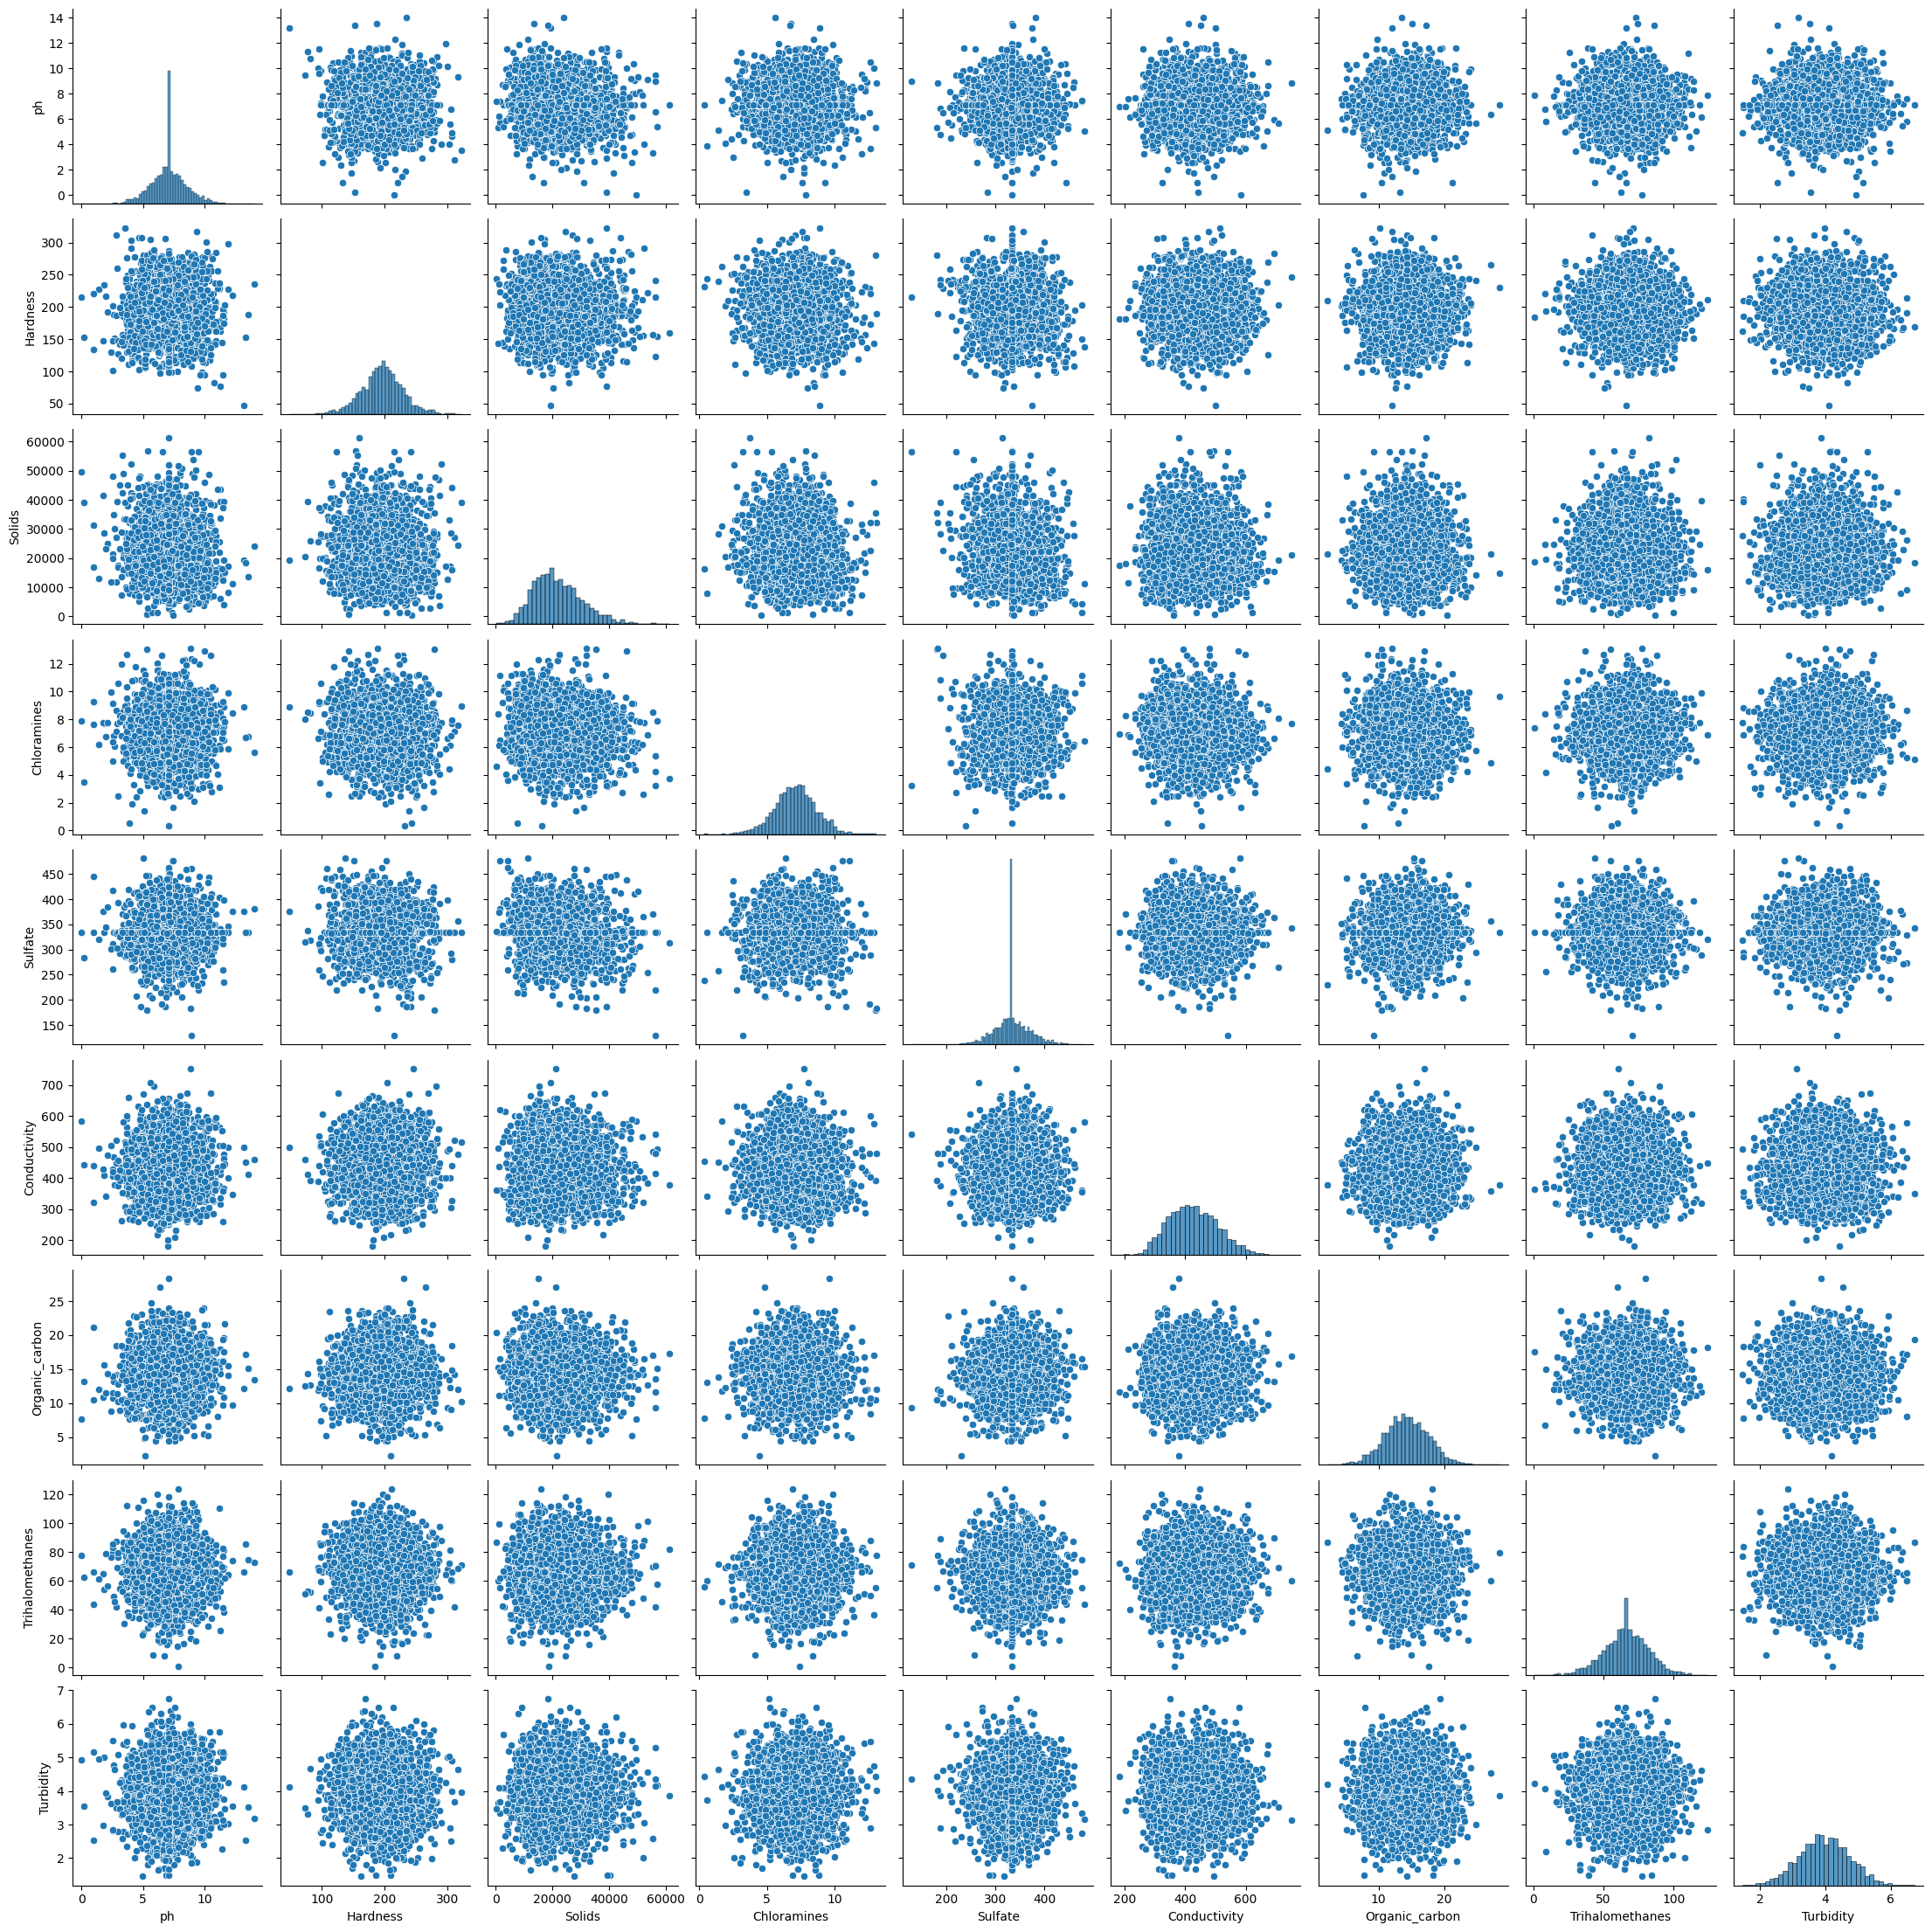

In [9]:
sns.pairplot(df.drop('Potability', axis=1))
plt.show()

In [10]:
# Displaying statistical summary of dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


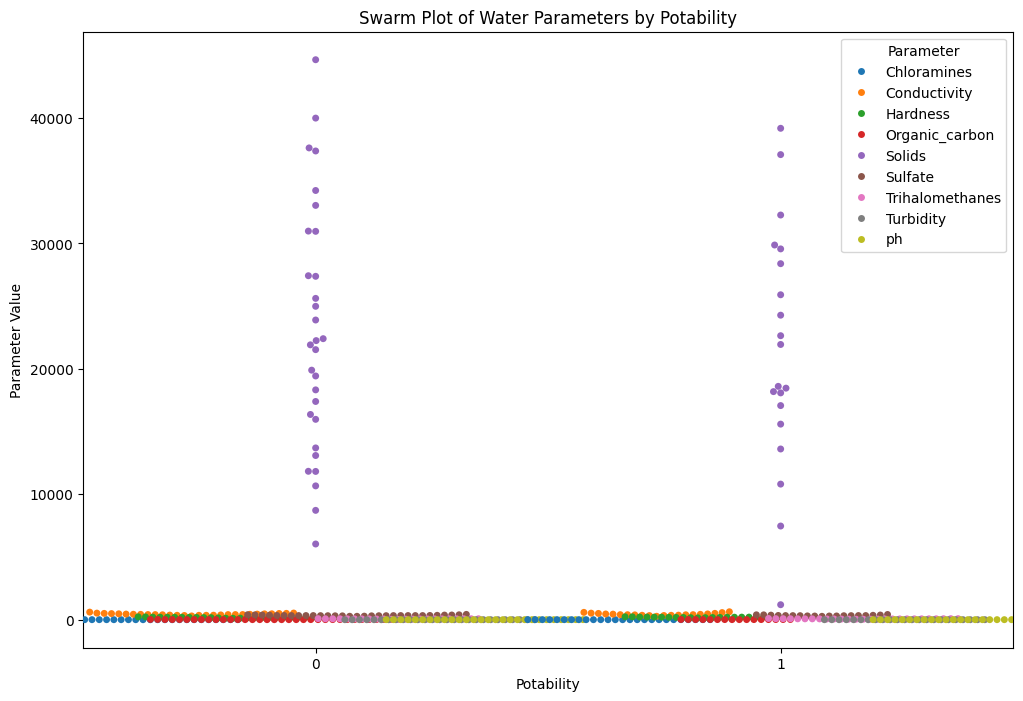

In [11]:
# Swarmplot of dataset
df_long = pd.melt(df, id_vars=['Potability'], var_name='Parameter', value_name='Value')
df_long_sample = df_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Potability', y='Value', data=df_long_sample, hue='Parameter', dodge=True)
plt.xlabel('Potability')
plt.ylabel('Parameter Value')
plt.title('Swarm Plot of Water Parameters by Potability')
plt.show()

In [12]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Potability'])), columns=df.columns[:-1])
df_scaled['Potability'] = df['Potability']


In [13]:
# Displaying statistical summary of scaled dataset
df_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505771,0.540231,0.356173,0.529963,0.581699,0.427940,0.463026,0.532673,0.475853,0.390110
std,0.104997,0.119263,0.143968,0.123921,0.102669,0.141336,0.126750,0.127938,0.147548,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198,0.000000
50%,0.505771,0.542401,0.338338,0.530591,0.581699,0.420386,0.460473,0.532673,0.473630,0.000000
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


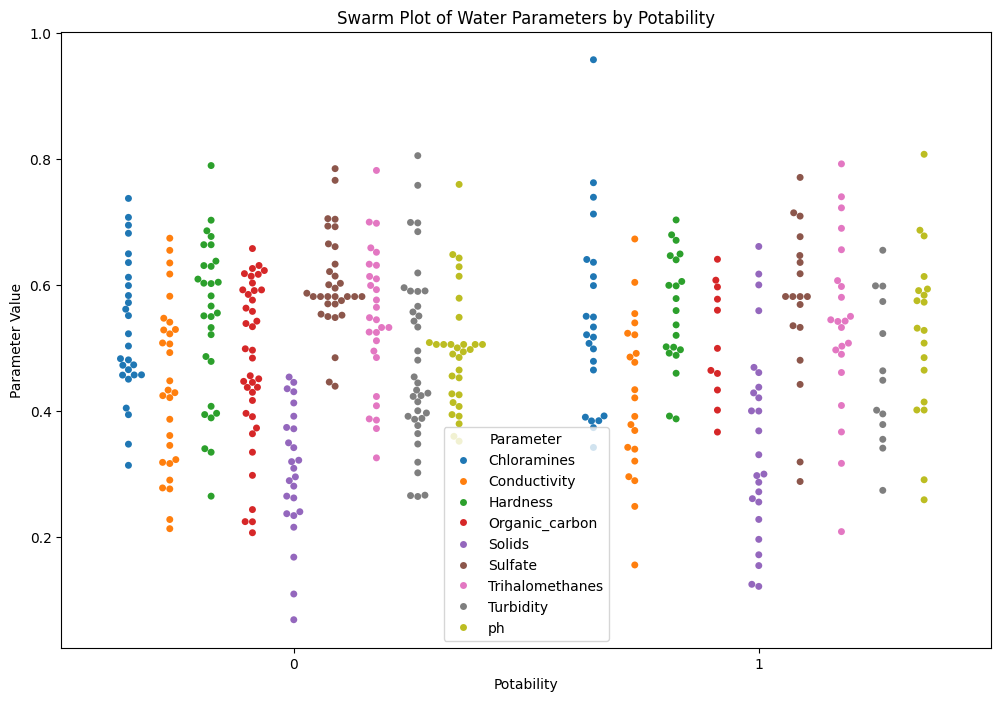

In [14]:
# Swarmplot of scaled dataset
df_scaled_long = pd.melt(df_scaled, id_vars=['Potability'], var_name='Parameter', value_name='Value')
df_scaled_long_sample = df_scaled_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Potability', y='Value', data=df_scaled_long_sample, hue='Parameter', dodge=True)
plt.xlabel('Potability')
plt.ylabel('Parameter Value')
plt.title('Swarm Plot of Water Parameters by Potability')
plt.show()

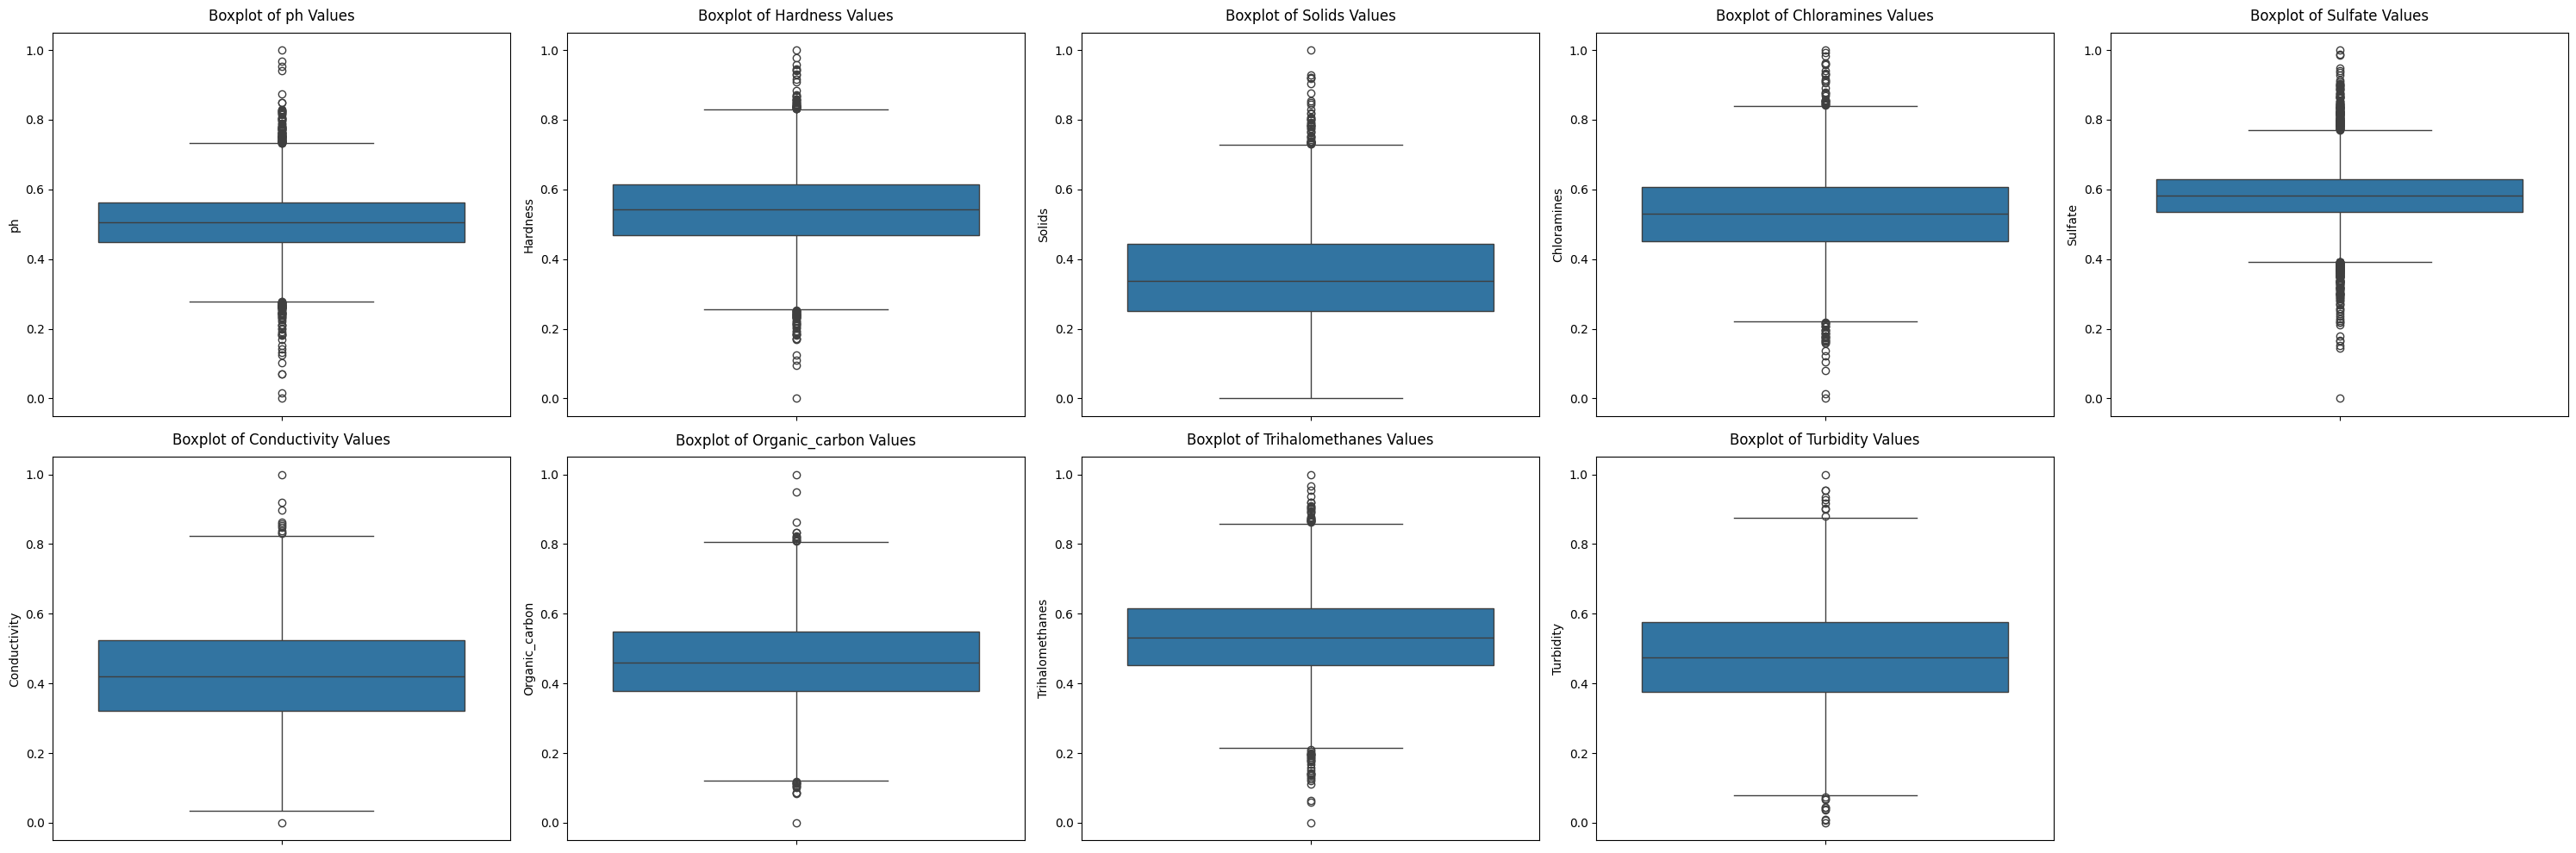

In [15]:
# Checking outliers in scaled dataset

# Excluding 'Potability' column
cols_to_plot = [col for col in df_scaled.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num = len(cols_to_plot)
rows_num = 2

# Calculating number of subplots needed
subplots_needed_bp = cols_num

# Calculating the number of subplots per row
subplots_per_row = cols_num // rows_num + (cols_num % rows_num > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num, subplots_per_row, figsize=(30, 10))
axes = axes.flatten()

# Displaying boxplot for each column excluding Potability
for idx, column in enumerate(cols_to_plot):
    sns.boxplot(y=df_scaled[column], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column} Values', pad=10)  
# Removing empty subplots
for idx in range(subplots_needed_bp, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [16]:
# Removing outliers using IQR method
columns_to_exclude = ['Potability']
Q1 = df_scaled.drop(columns=columns_to_exclude).quantile(0.25)
Q3 = df_scaled.drop(columns=columns_to_exclude).quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df_scaled.drop(columns=columns_to_exclude) < (Q1 - 1.5 * IQR)) | (df_scaled.drop(columns=columns_to_exclude) > (Q3 + 1.5 * IQR))).any(axis=1)
df_scaled_no_outliers_iqr = df_scaled[~outlier_mask]

print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape After Removing Outliers (IQR method):", df_scaled_no_outliers_iqr.shape)



Original DataFrame Shape: (3276, 10)
DataFrame Shape After Removing Outliers (IQR method): (2666, 10)


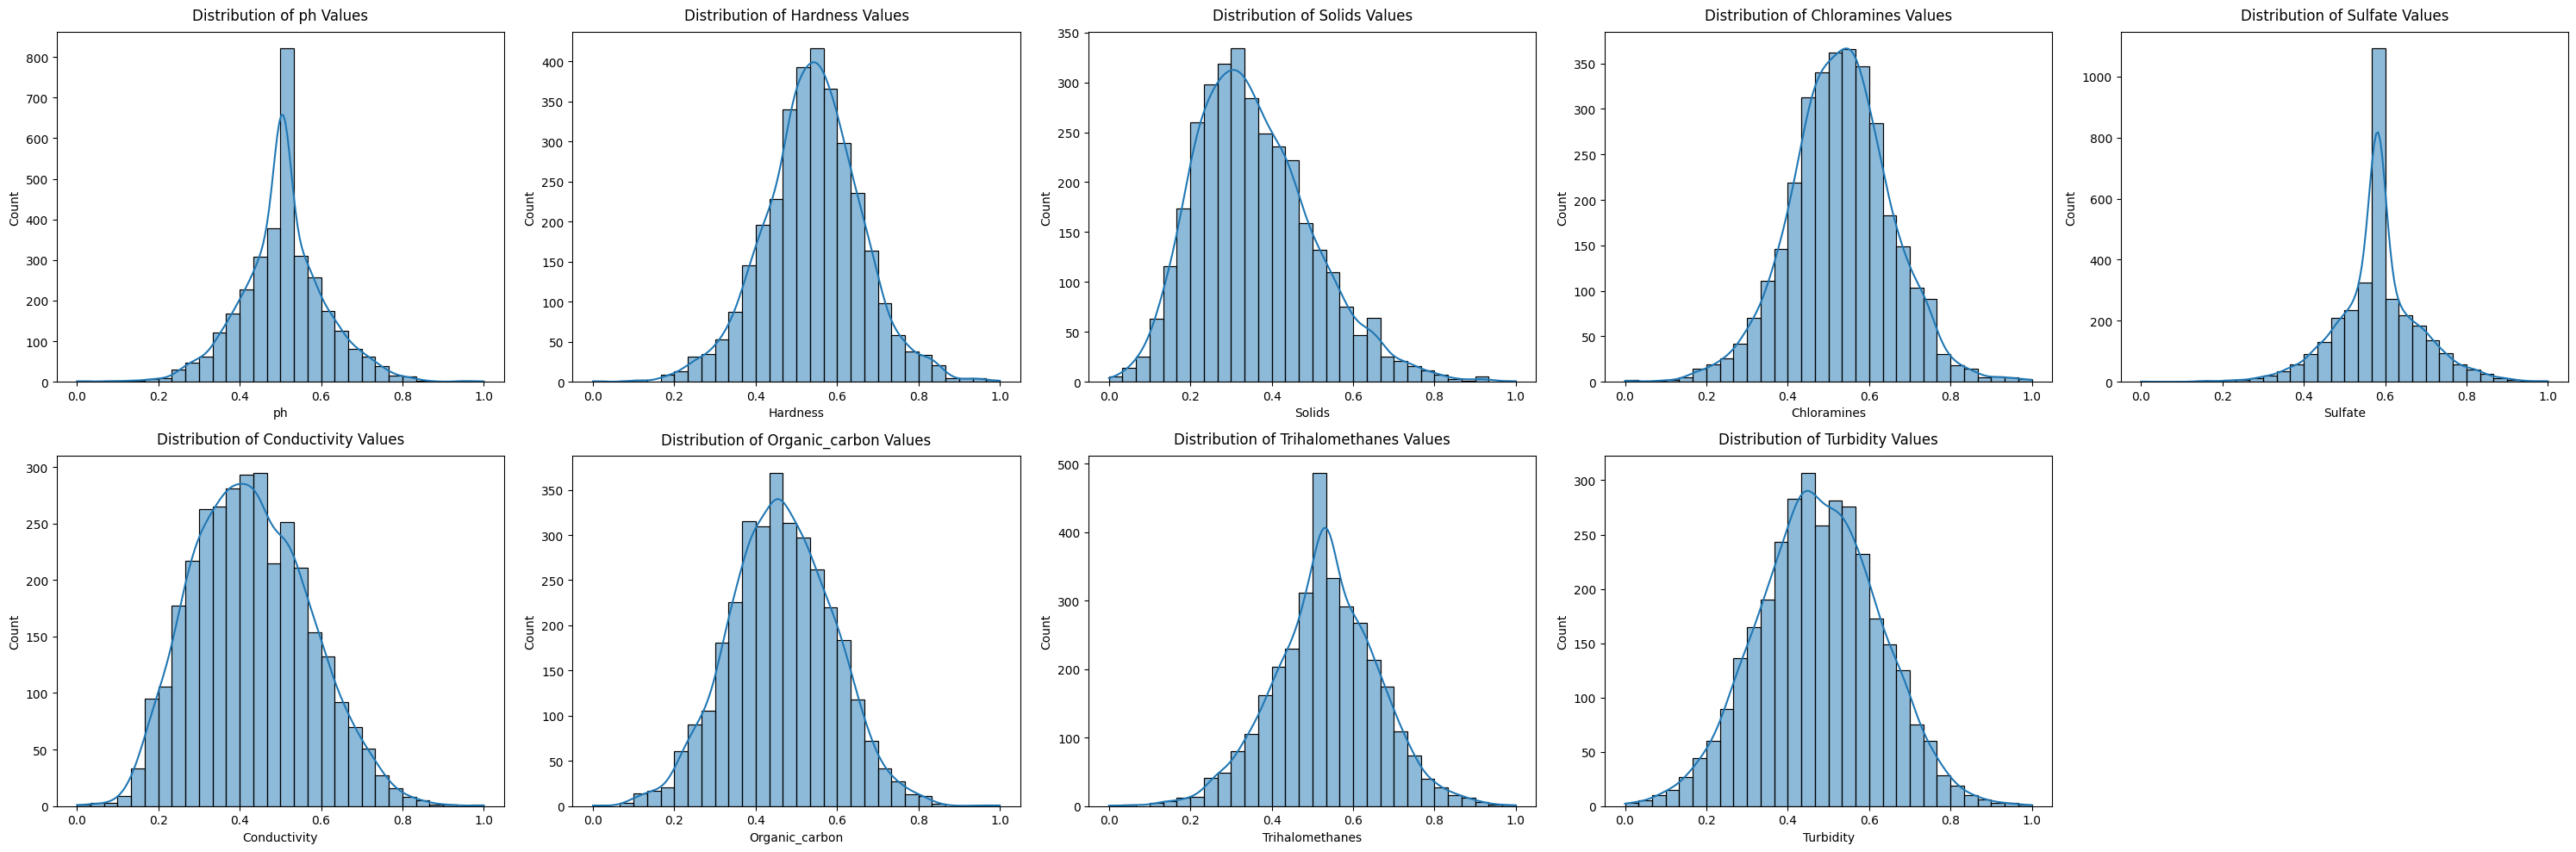

In [17]:
# Checking normality of scaled dataset

# Excluding 'Potability' column
cols_to_plot1 = [col for col in df_scaled.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num1 = len(cols_to_plot1)
rows_num1 = 2

# Calculating number of subplots needed
subplots_needed1 = cols_num1

# Calculating the number of subplots per row
subplots_per_row1 = cols_num1 // rows_num1 + (cols_num1 % rows_num1 > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num1, subplots_per_row1, figsize=(30, 10))
axes = axes.flatten()

# Displaying histogram for each column excluding Potability
for idx, column in enumerate(cols_to_plot1):
    sns.histplot(df_scaled[column], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} Values', pad=10)  # Adjust title position

# Removing empty subplots
for idx in range(subplots_needed1, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [18]:
# Appling shapiro test 
from scipy.stats import shapiro
cols_for_shapiro = [col for col in df_scaled.columns if col != 'Potability']

for column in cols_for_shapiro:
    stat, p_value = shapiro(df_scaled[column])
    print(f"{column}: Statistic={stat}, p-value={p_value}")


ph: Statistic=0.9799453616142273, p-value=4.005386644463272e-21
Hardness: Statistic=0.995968222618103, p-value=9.579586901509174e-08
Solids: Statistic=0.9777269959449768, p-value=2.955943348526295e-22
Chloramines: Statistic=0.996772050857544, p-value=1.8123619156540371e-06
Sulfate: Statistic=0.9591531753540039, p-value=2.0226480397084862e-29
Conductivity: Statistic=0.9929697513580322, p-value=1.5015037824195332e-11
Organic_carbon: Statistic=0.9995209574699402, p-value=0.6202165484428406
Trihalomethanes: Statistic=0.9969845414161682, p-value=4.1832927308860235e-06
Turbidity: Statistic=0.9996957778930664, p-value=0.9306948781013489


In [19]:
df_scaled.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [20]:
# Defining X and y
X = df_scaled[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_scaled['Potability']

In [21]:

# Importing machine learning models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC        
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


In [22]:
# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Making list of supervised machine learning classification models
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Assigning names to listed models
model_names = [
    'LogisticRegression',
    'SVC_model',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'KNeighborsClassifier'
]


In [25]:
models_scores = []
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    Percision = precision_score(y_test, y_pred)
    Recall_score = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    models_scores.append((model_name, accuracy, Percision, Recall_score, F1_score))

sorted_models = sorted(models_scores, key=lambda x: x[1], reverse=True)
for model in sorted_models:
    print(f"{model[0]}, Accuracy Score: {model[1]:.2f}, Precision Score: {model[2]:.2f}, Recall Score: {model[3]:.2f}, F1 Score: {model[4]:.2f}")

C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC_model, Accuracy Score: 0.70, Precision Score: 0.75, Recall Score: 0.28, F1 Score: 0.41
RandomForestClassifier, Accuracy Score: 0.68, Precision Score: 0.62, Recall Score: 0.35, F1 Score: 0.45
KNeighborsClassifier, Accuracy Score: 0.65, Precision Score: 0.53, Recall Score: 0.40, F1 Score: 0.46
LogisticRegression, Accuracy Score: 0.63, Precision Score: 0.00, Recall Score: 0.00, F1 Score: 0.00
DecisionTreeClassifier, Accuracy Score: 0.57, Precision Score: 0.44, Recall Score: 0.48, F1 Score: 0.46


In [175]:
# Making predictions from SVC model
from sklearn.svm import SVC        

# Defining X and y
X = df_scaled[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_scaled['Potability']

# Calling model
model = SVC()

# Fitting model
model.fit(X, y)

# Predicting model
prediction = model.predict(scaler.transform([[6, 100, 12000, 867, 265, 123, 111, 90, 888]]))
print("Prediction:", prediction)


Prediction: [1]


C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
